In [1]:
# import the libraries as shown below
from tensorflow import keras
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../input/indian-currency-notes-classifier/Train'
valid_path = '../input/indian-currency-notes-classifier/Test'

In [3]:
# useful for getting number of output classes
folders = glob('../input/indian-currency-notes-classifier/Train/*')

In [4]:
folders

[]

In [5]:

Classifier=keras.models.Sequential()

Classifier.add(keras.layers.Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

Classifier.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
Classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

Classifier.add(keras.layers.Flatten())

Classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
Classifier.add(keras.layers.Dense(units = 7, activation = 'softmax'))

In [6]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,)

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [9]:
test_set = test_datagen.flow_from_directory('Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [10]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\yashk\AppData\Local\Temp/ipykernel_2460/3819169585.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = Classifier.fit_generator(
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
5/5 [==============================] - 5s 907ms/step - loss: 8.4126 - accuracy: 0.1307 - val_loss: 3.0344 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 4s 816ms/step - loss: 2.0489 - accuracy: 0.1569 - val_loss: 1.9288 - val_accuracy: 0.1905
Epoch 3/50
5/5 [==============================] - 4s 776ms/step - loss: 1.9249 - accuracy: 0.1830 - val_loss: 1.9066 - val_accuracy: 0.1429
Epoch 4/50
5/5 [==============================] - 4s 807ms/step - loss: 1.9004 - accuracy: 0.1634 - val_loss: 1.8556 - val_accuracy: 0.1667
Epoch 5/50
5/5 [==============================] - 4s 805ms/step - loss: 1.8613 - accuracy: 0.3529 - val_loss: 1.7874 - val_accuracy: 0.3333
Epoch 6/50
5/5 [==============================] - 4s 767ms/step - loss: 1.7708 - accuracy: 0.3203 - val_loss: 1.6373 - val_accuracy: 0.3333
Epoch 7/50
5/5 [==============================] - 4s 820ms/step - loss: 1.5716 - accuracy: 0.3791 - val_loss: 1.3322 - val_accuracy: 0.4286
Epoch 8/50
5/5 [====

In [11]:
r.history

{'loss': [8.412559509277344,
  2.0488836765289307,
  1.924912452697754,
  1.900374412536621,
  1.861344337463379,
  1.7707998752593994,
  1.5715903043746948,
  1.424379587173462,
  1.3222966194152832,
  1.1133712530136108,
  1.0288562774658203,
  0.9266154170036316,
  0.8103610873222351,
  0.7236180305480957,
  0.6135491132736206,
  0.5559539794921875,
  0.594260036945343,
  0.5460911393165588,
  0.4429447054862976,
  0.39734208583831787,
  0.35739490389823914,
  0.36506232619285583,
  0.4111960530281067,
  0.37886694073677063,
  0.3133963644504547,
  0.38750556111335754,
  0.32448163628578186,
  0.26604458689689636,
  0.2562772333621979,
  0.23910033702850342,
  0.2304912954568863,
  0.2718750834465027,
  0.22621506452560425,
  0.2160109430551529,
  0.229304701089859,
  0.13019809126853943,
  0.14756162464618683,
  0.14871282875537872,
  0.08178295940160751,
  0.07563304156064987,
  0.05244094878435135,
  0.07065745443105698,
  0.07768160104751587,
  0.1205211952328682,
  0.0628982782

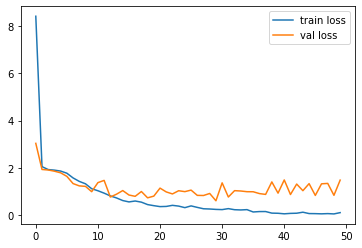

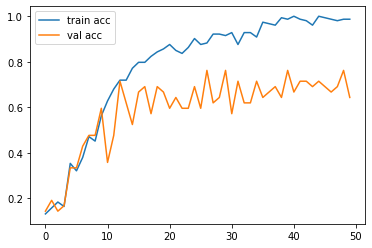

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
# save it as a h5 file
# from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [14]:
y_pred = Classifier.predict(test_set)

In [15]:
y_pred

array([[4.01308164e-02, 3.69176388e-15, 2.22822732e-15, 4.87280704e-06,
        9.59859669e-01, 1.66506271e-11, 4.73689715e-06],
       [2.25058161e-02, 3.10401060e-06, 1.19650352e-07, 8.71422350e-01,
        1.56360008e-02, 2.18812129e-05, 9.04106498e-02],
       [6.72722831e-18, 9.95628953e-01, 4.10538503e-21, 1.96025943e-12,
        5.27651378e-19, 8.59846291e-11, 4.37108334e-03],
       [1.34380043e-05, 2.76595540e-03, 3.21262057e-08, 8.38448386e-07,
        2.30591488e-03, 6.74503684e-01, 3.20410162e-01],
       [9.54853535e-01, 3.10287783e-16, 1.44485899e-12, 4.28651781e-09,
        4.51464988e-02, 5.21903520e-10, 3.89591248e-09],
       [1.08241688e-11, 9.80266750e-01, 1.31520540e-13, 8.58978028e-11,
        5.50332089e-12, 4.04622297e-05, 1.96927972e-02],
       [1.50797319e-10, 1.68435672e-05, 2.16578405e-15, 5.09458578e-12,
        4.84288787e-09, 3.93022856e-05, 9.99943852e-01],
       [2.67918101e-11, 2.04706565e-03, 1.19907983e-14, 8.75535148e-12,
        9.29294530e-10, 1

In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [17]:
y_pred

array([4, 3, 1, 5, 0, 1, 6, 6, 4, 2, 0, 2, 6, 0, 4, 0, 6, 1, 0, 1, 0, 1,
       3, 0, 0, 5, 6, 4, 0, 0, 1, 0, 0, 2, 6, 2, 4, 1, 6, 3, 6, 6],
      dtype=int64)

In [18]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image

In [19]:
model=keras.models.load_model('model_Classifier.h5')

In [20]:
img=keras.preprocessing.image.load_img('Test/1Hundrednote/1.jpg',target_size=(224,224))

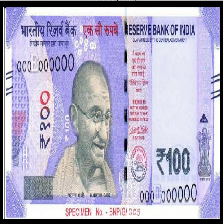

In [21]:
img

In [22]:
test_image=keras.preprocessing.image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [23]:
result = Classifier.predict(test_image)
result

array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
a=np.argmax(model.predict(test_image), axis=1)

In [25]:
img_20=keras.preprocessing.image.load_img('Test/Twentynote/1.jpg',target_size=(224,224))

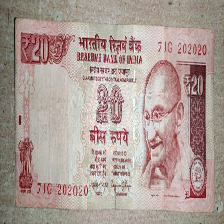

In [26]:
img_20

In [27]:
test_image=keras.preprocessing.image.img_to_array(img_20)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

array([[0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
import cv2
from cv2 import *
import os
import time

def imageCapture():
    cam = cv2.VideoCapture(0)
    time.sleep(15)
    result, image = cam.read()
    if result:
        path = os.getcwd()
        path = os.path.join(path, "Test")
        path = os.path.join(path, f"1.jpg")
        cv2.imshow("1", image)
        cv2.imwrite(path, image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No image detected. Please! try again")



In [29]:
notes = [100, 200, 2000, 500, 50, 10, 20]

In [35]:
imageCapture()
img_20=keras.preprocessing.image.load_img('Test/1.jpg',target_size=(224,224))
test_image=keras.preprocessing.image.img_to_array(img_20)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
notes[np.argmax(result)]

100

In [31]:
img_100=keras.preprocessing.image.load_img('Test/1Hundrednote/1.jfif',target_size=(224,224))
test_image=keras.preprocessing.image.img_to_array(img_100)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
notes[np.argmax(result)]

100

In [32]:
img_50=keras.preprocessing.image.load_img('Test/Fiftynote/1.jfif',target_size=(224,224))
test_image=keras.preprocessing.image.img_to_array(img_50)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
notes[np.argmax(result)]

50

In [33]:
img_20=keras.preprocessing.image.load_img('Test/Twentynote/1.jpg',target_size=(224,224))
test_image=keras.preprocessing.image.img_to_array(img_20)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
notes[np.argmax(result)]

20